# Textual data is ubiquitous, and there is a huge potential in being able to reli￾ably extract information from large amounts of text, as well as in being able to learn from it. 
> As the saying goes, data is the new oil!
<br>
______________________________________________________________________________________________
> The beginning of the field is often attributed to the early 1950s, in particular to the
Georgetown–IBM experiment that attempted implementing a fully automated machine translation system between Russian and English
<br>
______________________________________________________________________________________________
> The early approaches to the tasks in NLP were based on rules and templates that
were hardcoded into the systems: for example, linguists and language experts would
come up with patterns and rules of how a word or phrase in one language should be
translated into another word or phrase in another language
<br>
______________________________________________________________________________________________
> A notable example is the early chatbot
ELIZA, which relies on the use of templates
<br>
______________________________________________________________________________________________
> A real improvement to many of the NLP tasks came along in
the 1980s with the introduction of statistical approaches, based on the observations
made on the language data itself and statistics derived from the data, and machine learning algorithms.
<br>
______________________________________________________________________________________________
> The key difference between rule-based approaches and statistical approaches is
that the rule-based approaches rely on a set of very precise but rigid and ultimately
inflexible rules, whereas the statistical approaches don’t make assumptions—they try
to learn what’s right and what’s wrong from the data, and they can be flexible about
their predictions.
<br>
______________________________________________________________________________________________
> The 1990s brought about one other major improvement—the World Wide Web
was created and made available to the general public, and this made it possible to get
access to and accumulate large amounts of data for the algorithms to learn from. The
web also introduced completely new tasks and domains to work on: for example,
before the creation of social media, social media analytics as a task didn’t exist.
<br>
______________________________________________________________________________________________
> In the 2010s, the advances in computer
hardware finally made it possible to adopt a new family of more powerful and more
sophisticated machine-learning approaches that became known as deep learning. 

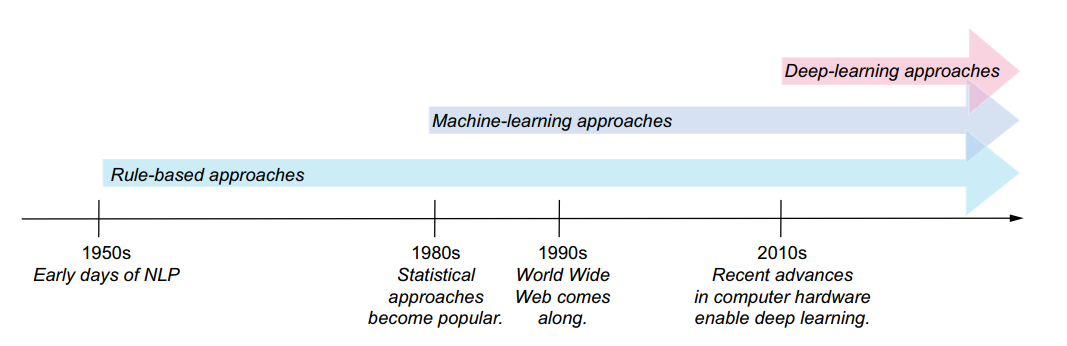

# Information search
> Let’s start with a very typical scenario: you are searching for all work documents
related to a particular event or product
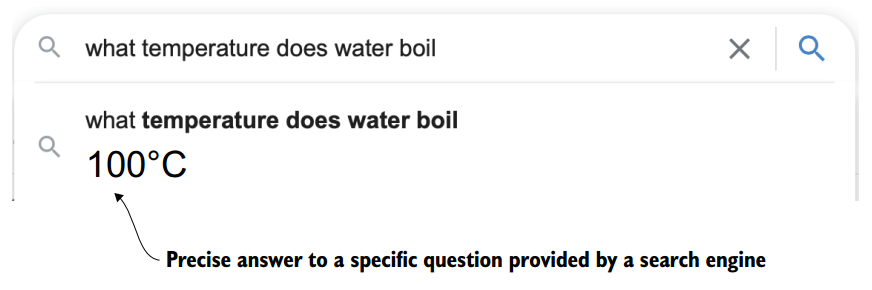
___________________________________________________________________________________
> These are all examples of what is in essence the very same task—information search, or
technically speaking, information retrieval. You will see shortly how all the varieties of
the task are related. It boils down to the following steps:
<br>
>> 1. You submit your “query,” the question that you need an answer to or more
information on.
<br><br>
>> 2. The computer or search engine (Google being an example here) returns either
the answer (like 100°C) or a set of results that are related to your query and
provide you with the information requested. 

## The first question might seem easy—you need all the documents that contain words like meeting and management, and you are not interested in any other documents, so this is simple filtering
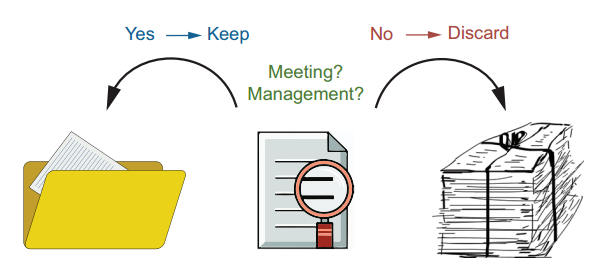

#  it’s not true that machines truly “understand” language, at least not in the same way we humans do. 
>if you were to look through the documents and search for occurrences of meeting and management, you would simply read through the documents and spot these words, because
you have a particular representation of the word in mind and you know how it is
spelled and how it sounds. The machines don’t actually have such representations.
____________________________________________________________________________
> One thing that machines are good at is dealing with numbers, so the obvious candidate for word and language representation in the “mechanical mind” is numerical
representation.
_____________________________________________________________________________________
> This means that humans need to “translate” the words from the representations that are common for us into the numerical language of the machines in
order for the machines to “understand” words.
*  The particular representation that you
will often come across in natural language processing is a vector.

## Query = "management meeting" contains only two words, and in a vector each of them will get its own dimension. Similarly, in an array, each one will get its own cell
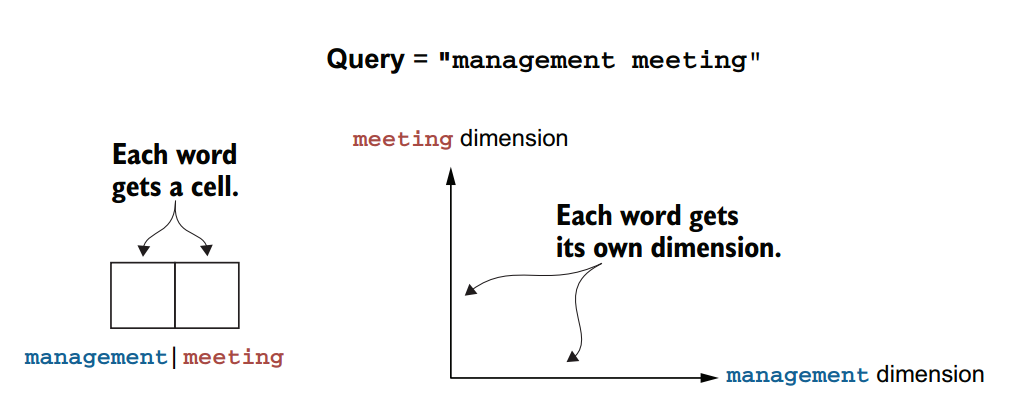
* The cell of the array that is assigned to management will be responsible for keeping all
the information related to management, and the cell that is assigned to meeting will
similarly be related to meeting. 

##  This is expressed in the number of occurrences of each word in the query. Therefore, we should fill in the cells of the array with these counts. As for the vector, each count in the corresponding dimension will be interpreted as a coordinate.
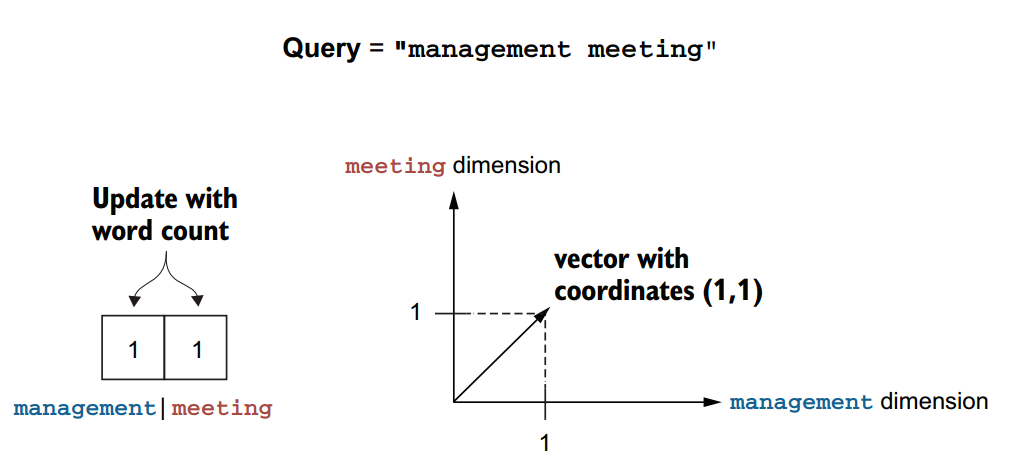

## We use a similar idea to “translate” the word occurrences in documents into the arrays and vector representations: simply count the occurrences. So, for some docu￾ment Doc1 containing five occurrences of the word meeting and three of the word management, and for document Doc2 with one occurrence of meeting and four of management
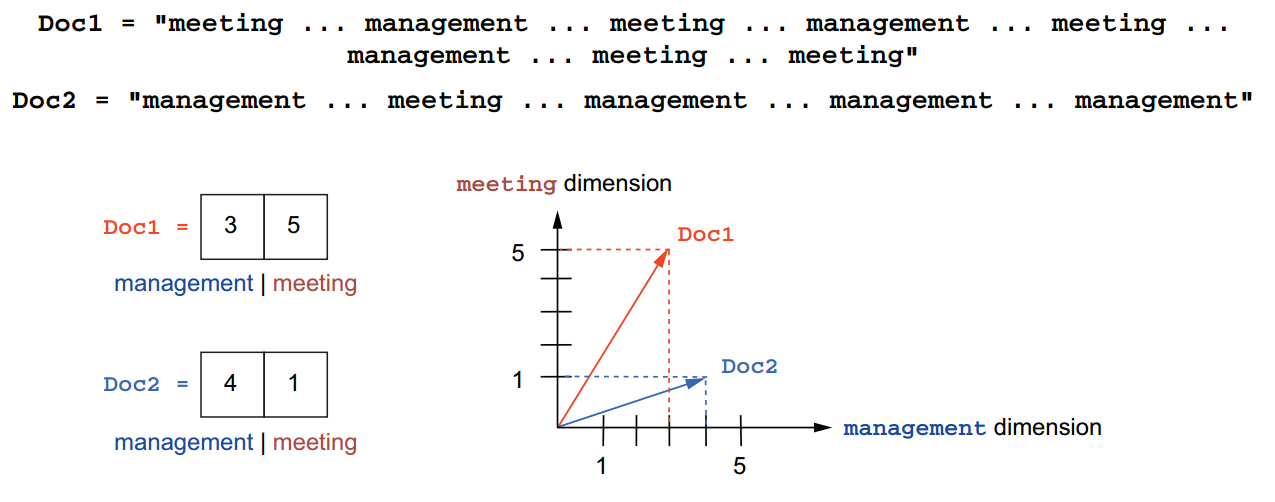

In [1]:
# Represents a document based on keywords only
doc1 = "meeting ... management ... meeting ... management ... meeting "
doc1 += "... management ... meeting ... meeting"
# Initializes array vector
vector = [0, 0]
# The text is read in, and words are detected.
for word in doc1.split(" "):
    # Count for “management” is incremented in cell 0.
    if word=="management":
        vector[0] = vector[0] + 1
    # Count for “meeting” is incremented
    if word=="meeting":
        vector[1] = vector[1] + 1
# This line should print [3, 5] for you.
print(vector)

[3, 5]


* we’ll be using a special tool called a tokenizer, for this task. Yet splitting by whitespaces is a brute-force
strategy good enough for our purposes in this example. 

## To return the document most relevant to our query, we need to find the one that has most similar content to the query.
> We used vector representations to visualize the query and documents in the geometrical space. This space is a visual representation of the space in which we encoded our documents.
__________________________________________________________
> That is where the geometrical space
representation comes in handy—each object in this space is defined by its coordinates, and the most similar objects are located close to each other.

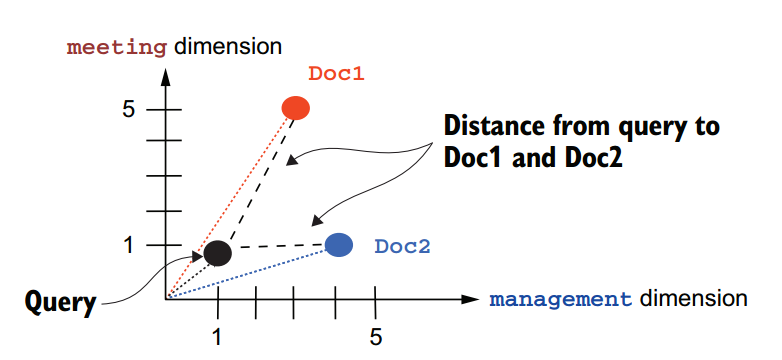

## The measurement of distance in geometrical space originates with the good ole Pythagorean theorem. 
> Here’s a refresher: in a right triangle, the square of the hypotenuse
(the side opposite to the right angle) length equals the sum of the squares of the
other two sides’ lengths.

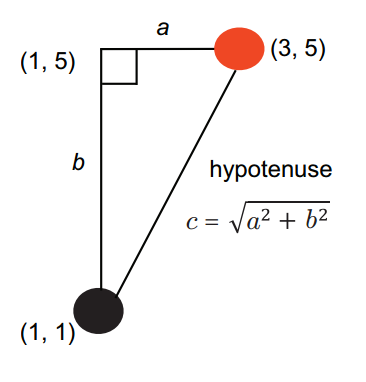
* This calculation is called Euclidean distance, and the geometrical interpretation is generally referred to as Euclidean space. 

> Euclidean distance
>> The Euclidean distance between two points in space is measured as the length of
the line between these points. In NLP, it can be used to measure the similarity
between two texts (i.e., the distance between two vectors representing these texts).

In [1]:
#  Both query and document are hardcoded in this example.
# Then the for-loop adds up squares of the difference in the coordinates in the query
# and the document along each dimension, using math functionality. Finally, the square
# root of the result is returned.
import math #Imports Python’s math library
# The query is hardcoded as [1, 1].
# The document is hardcoded as [3, 5].
query = [1, 1] 
doc1 = [3, 5] 
sq_length = 0
# For-loop is used to estimate the distance
for index in range(0, len(query)): 
    # math.pow is used to calculate the square (degree of 2) of the input.
    sq_length += math.pow((doc1[index] - query[index]), 2) 
    # math.sqrt calculates the square root of the result, which should be ≈ 4.47
    print (math.sqrt(sq_length)) 

2.0
4.47213595499958


## There’s one more point that we are missing at the moment. 
>Note that if we typed in management and meeting multiple times in our query,
the content and information need would not change, but the vector itself would.
>___________________________________________________________________________________
>In particular, the length of the vector will be different, but the angle between the first version
of the vector and the second one won’t change
<br><br>
>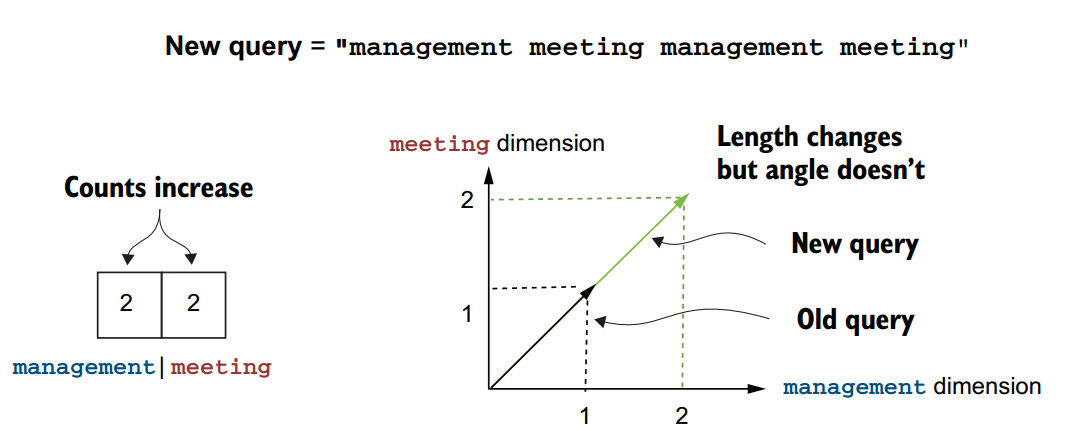

## The angle between the vectors is a much more stable measure than the length

> Otherwise the versions of the same query with multiple repetitions of the same words will actually have nonzero distance between them, which
does not make sense from the information content point of view.
>____________________________________________________________________
> The measure that
helps estimate the angle between vectors is called **cosine similarity**, and it has a nice
property of being higher when the two vectors are closer to each other with a smaller
angle (i.e., more similar) and lower when they are more distant with a larger angle
(i.e., less similar).
>_______________________________________________________________________
> The cosine of a 0° angle equals 1, meaning maximum closeness and
similarity between the two vectors.
> _________________________________________________________________________
> 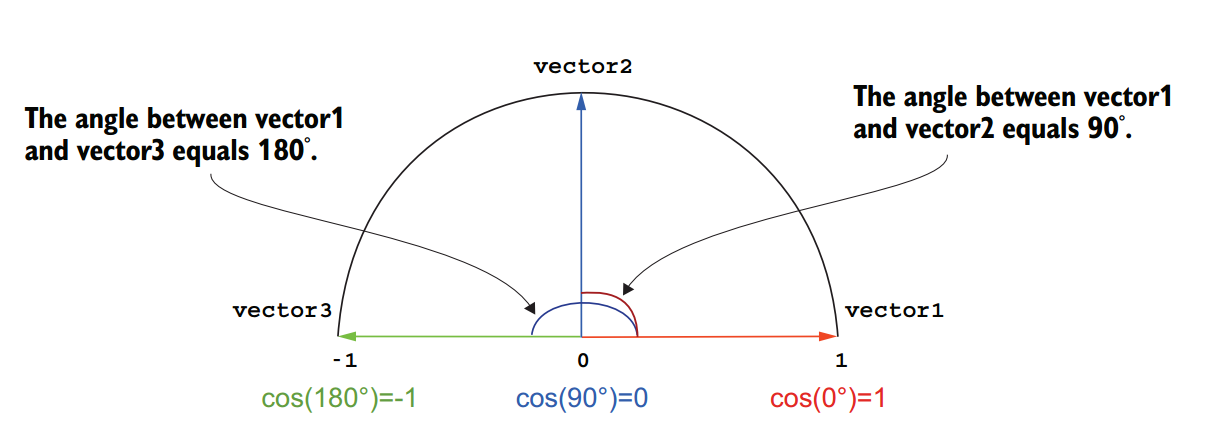

>## Cosine similarity
>>Cosine similarity estimates the similarity between two nonzero vectors in space (or
two texts represented by such vectors) on the basis of the angle between these
vectors—for example, the cosine of 0° equals 1, which denotes the maximum similarity, and the cosine of 180° equals –1, which is the lowest value.
>>-
>> * Unlike Euclidean
distance, this measure is not affected by vector length.

> * When we build vectors
based on word occurrence counts, the cosine similarity will range between 0 for the
least similar (perpendicular, or orthogonal) vectors and 1 for the most similar, in
extreme cases overlapping, vectors.
> * The estimation of the cosine of an angle relies on another Euclidean space estimation: dot product between vectors. Dot product is simply the sum of the coordinate
products of the two vectors taken along each dimension.
> * in the general form we calculate cosine similarity between vectors vec1
and vec2 as
`cosine(vec1,vec2) = dot_product(vec1,vec2)/(length(vec1)*length(vec2))`
>* This is directly derived from the Euclidean definition of the dot product, which says
that 
`dot_product(vec1,vec2) = length(vec1)*length(vec2)*cosine(vec1,vec2)`

In [2]:
# Function length applies all length calculations to the passed argument, whereas length itself can be calculated using Euclidean distance.
# Next, function dot_product calculates dot product between arguments vector1 and vector2. 
# Since you can only measure the distance between vectors of the
# same dimensionality, the function makes sure this is the case and returns an error otherwise. 
# Finally, specific arguments query and doc1 are passed to the functions, and the
# cosine similarity is estimated and printed out.
import math
query = [1, 1]
doc1 = [3, 5]
# Function length applies all length calculations to the passed argument
def length(vector): 
    sq_length = 0
    # Length is calculated using Euclidean distance; coordinates (0, 0) are omitted for simplicity.
    for index in range(0, len(vector)):
        sq_length += math.pow(vector[index], 2) 
    return math.sqrt(sq_length) 
# Function dot_product calculates dot product between passed arguments.
# An error is returned if vectors are not of the same dimensionality.
def dot_product(vector1, vector2): 
    if len(vector1)==len(vector2):
        dot_prod = 0
        for index in range(0, len(vector1)):
            dot_prod += vector1[index]*vector2[index]
        return dot_prod
    else:
        return "Unmatching dimensionality" 
# Specific arguments queryand doc1 are passed to the functions.
cosine=dot_product(query, doc1)/(length(query)*length(doc1)) 
# A numerical value of ≈ 0.97 is printed.
print (cosine) 

0.9701425001453319


# Advanced information search: Asking the machine precise questions
> As you’ve seen in the earlier examples, it is not just the documents that you can find
by your query—you can also find direct answers to your questions.
>_________________________________________________
> For example, if you
type into your search engine “What temperature is it now?” you may get an answer
similar <br><br>
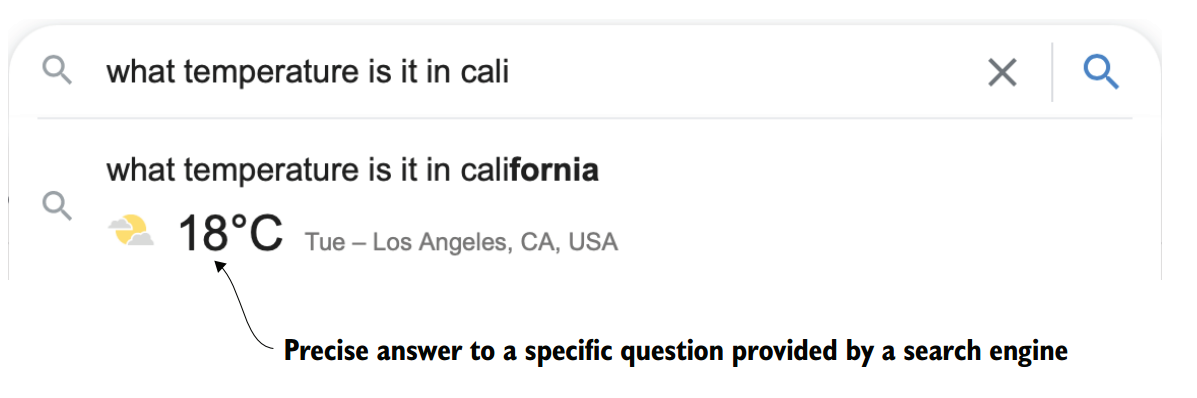

> some of the “magic” behind what’s going on should be clear to you now. If
the search engine knows that your information need concerns water’s boiling point, it
can use information-retrieval techniques similar to the ones we’ve just talked about to search for the most relevant pages.
>----
> But what about the precise answer?
>> These days you
can ask a machine a question and get a precise answer, and this looks much more like
machines getting real language understanding and intelligence!
>> ______________________________________________________
>> But **machines don’t really “understand” language**,
at least not in the sense humans do?
>>__________________________________________________
>> In fact, what you see here is another application
of NLP concerned with information extraction and question answering, and it helps
machines get closer to understanding language.<br><br>
>> 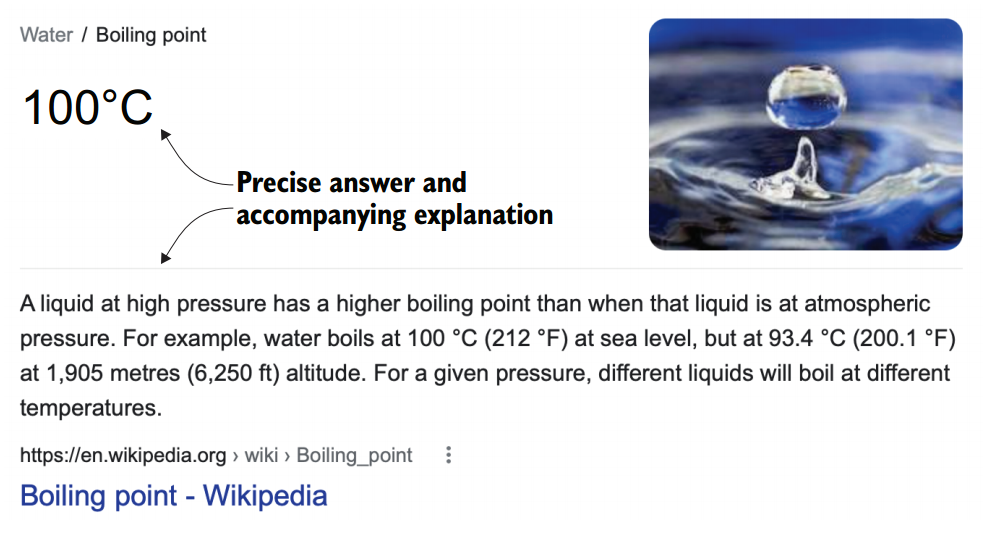

### The trick is:
1. to Identify in the natural language question the particular bit(s) the question is
about (e.g., the water boiling point).
2. Apply the search on the web to find the most relevant pages that answer that
question. 
3. Extract the bit(s) from these pages that answer(s) the question.
___________________________________________________________________
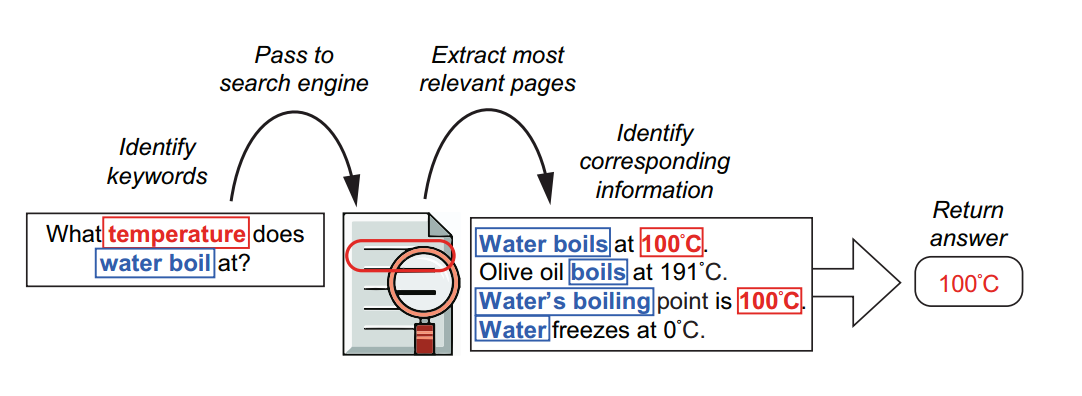

## To solve this task, the machine indeed needs to know a bit more about language than just the number of words, and here is where it gets really interesting. 
> 1. You can see from
the example here that to answer the question the machine needs to
Know which words in the question really matter.
>> For example, words like temperature, water, and boil matter, but what, do, and at don’t. The group {temperature, water, boil} are called content words, and the group {what, do, at} are
called function words or stopwords.
> 2. Know about the relations between words and the roles each one plays.
>> For
example, it is really the temperature that this question asks about, but the temperature is related to water, and the water is doing the action of boiling.<br><br>
>> The particular tools that will help you figure all this out are called part-of-speech taggers (they identify that words like water do the action, and the other words like boil denote the action itself) and parsers (they help identify how the words are
connected to each other)
> 3. Know that boiling means the same thing as boil. The tools that help you figure
this out are called stemmers and lemmatizers.

## Conversational agents and intelligent virtual assistants 
* Perhaps a more usual way to get answers to questions like “Who sings this song?” or “How warm is it
today?” now is to ask an intelligent virtual assistant.
* These are integrated in most smartphones, so depending on the one you’re using, you may be communicating with
Siri, Google Assistant, or Cortana.
>  there are two crucial bits that are involved in applications like intelligent virtual assistants:
> -
>### the input is no longer typed in, so the assistant needs to understand speech, and apart from particular actions like calling, the assistant is usually required to generate speech, which means translating the speech signal internally in a text form to processing the query using NLP, generating the answer in a natural language, and producing output speech signal.
> 
> 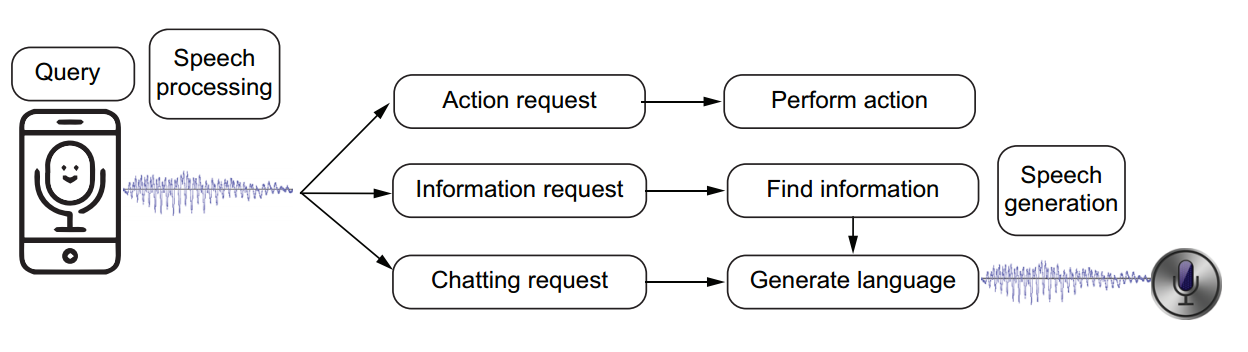
>> *  in many situations and, especially if a virtual assistant engages in some
natural conversation with the user like “How are you today, Siri?” it needs to generate
a natural-sounding response, preferably on the topic of the conversation. This is also
what conversational agents, or chatbots, do. 

# Text prediction and language generation
> If you use a smartphone, you probably have used the predictive keyboard at least
once. This is a good realistic example of text prediction in action.
> _________________
> 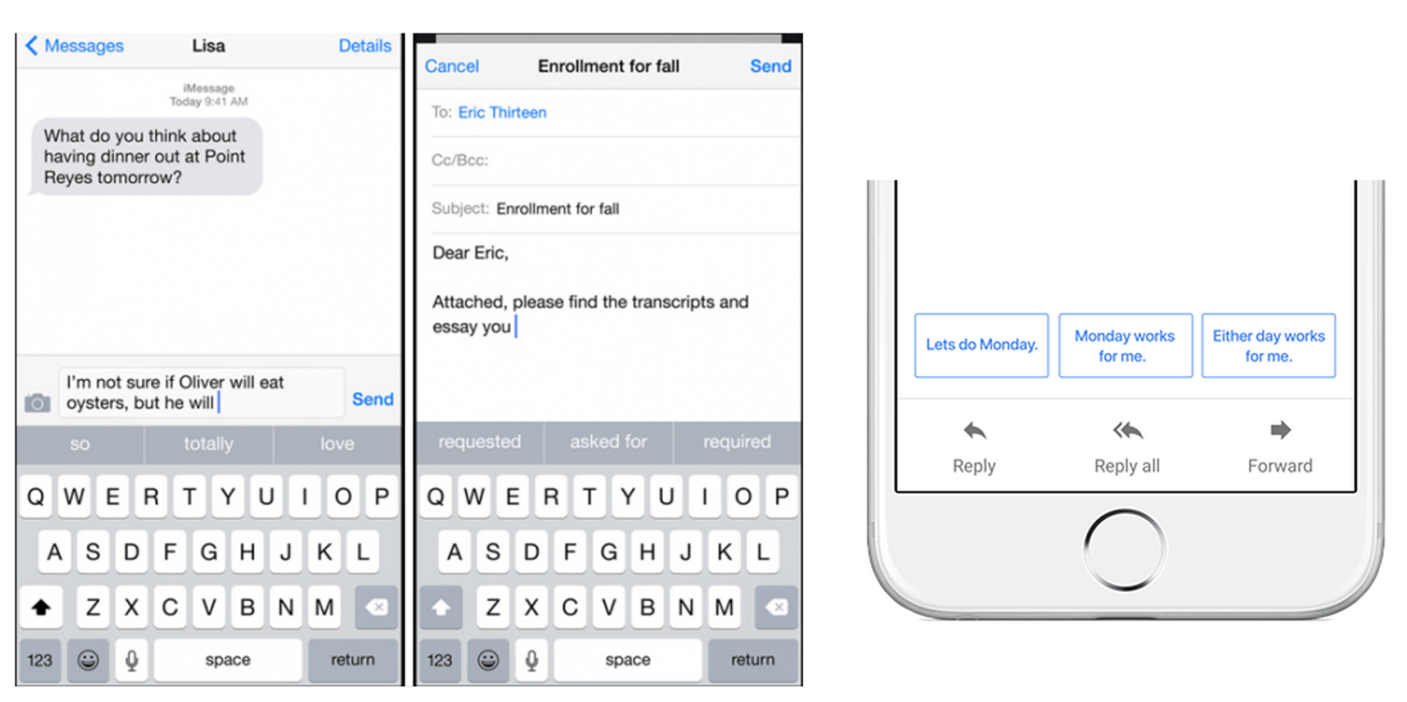

> ### Suppose I provide you with the beginning of a word, for example “langu___,” and ask you “What is the next character?” Alternatively, suppose you can see some words beginning a phrase, for instance “natural language ________.” Can you guess the next word?
> _____________________________________________
> machines can also learn about what’s most common in language if they are given such an opportunity.
> * The estimation of what is common and how common it is, is called probability estimation. In practice, you would estimate the probabilities as follows:<br>
>> if we’ve seen 100 contexts where the phrase “natural language ______” was used, and 90 of those were
“natural language processing,” 6 were “natural language understanding,” and 4 were
“natural language generation,” then you’d say that
>><br> `
Probability("Processing" given "Natural Language" as context) = 90/100 = 90%
`
<br>
`
Probability("Understanding" given "Natural Language" as context) = 6/100 = 6%
`
<br>
`
Probability("Generation" given "Natural Language" as context) = 4/100 = 4%
`
<br>
>> * Note that together the estimations add up to
100%.
>> * Note also that we can directly compare these probabilities and say that “processing” is more likely given that the beginning of the phrase is “natural language.”

> ##  In NLP terms, such context used in prediction is referred to as n-grams, where n represents the number of symbols (i.e., number of characters or words) that are considered as context. For example, l, a, and n in “language” represent character unigrams, while natural, language, and processing in “natural language processing” are word unigrams.
> ## Then la, an, and so on are character bigrams, and “natural language” and “language processing” are word bigrams. Trying to predict pairs of characters or words (i.e., bigrams) based on one previous character or word is called bigram modeling, predicting triplets of characters or words based on two previous ones is called trigram modeling, and so on.
> _________________________
> 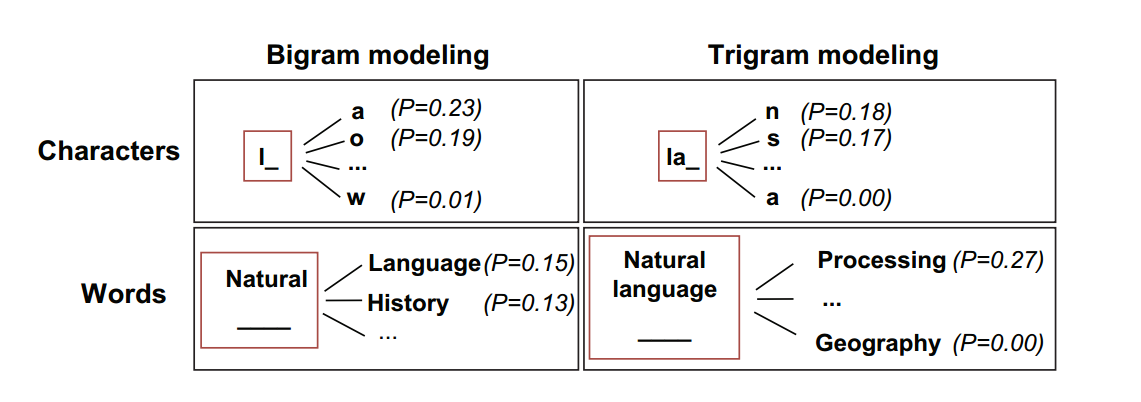

> N-gram 
>>An n-gram is a continuous sequence of n symbols (e.g., characters, words), where n
denotes the length of the sequence; that is, n = 1 is a unigram; n = 2 is a bigram,
and so on. N-grams are widely used in many NLP tasks, such as in text prediction
based on previous context.

> # what is the best n to take into account?
> #### If you were given no context to predict, the task of pre￾dicting a word or character would be impossible
> #### With one character (e.g., l) or one word (e.g., natural), the number of possibilities is still huge, especially for words.
> #### With two previous characters (la) or words (natural language), the correct prediction becomes easier, and for some long contexts (like langu), the possibilities narrow down to one or two options.
> * This means that the context helps in prediction.<br><br>
> **To summarize, the goal is to predict what is probable without
constraining it to only those sequences seen before, so the tradeoff between more reliable prediction with longer contexts and more diverse one with shorter contexts sug￾gests that something like two previous words or characters is good enough.** <br><br>
> 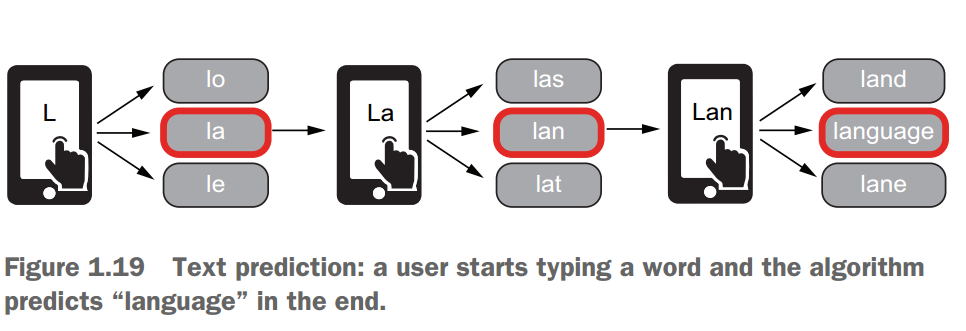

> ### This type of prediction based on the sequences of words and characters in context is known as language modeling, and it is at the core of text prediction on your smartphone, or of the Smart Reply technology in your email. 

> # neural-based language modeling:
> ## The idea is the same—the algorithm still tries to predict the next character or word based on context, but the use of context is more flexible.
> ## For instance, it might be the case that the most useful information for the next word prediction is not two characters or words away, but in the beginning of the sentence or in the previous phrase.
> * The n-gram models are quite
limited in this respect, whereas more computationally expensive approaches such as
neural models can deal with encoding large amounts of information from a wider
context and even identify which bits of the context matter more. 

# Spam filtering

> ### These days, email agents have spam filters incorporated in them, and you might be lucky enough to not see any of the spam emails that are filtered out by these algorithms.<br><br>
> #### how it works?
> * Think of something that you would consider to be a
spam email.
> * There are several red flags to consider here:
>>  1. an unknown sender,
>>  2. suspicious email address,
>>  3. unusual message formatting.
>> * Ultimately, a lot of what tells you it’s spam is its content.


> ## Machine Learning and Email Classification

>> Machine learning algorithms are fundamentally based on **statistical analysis** and **vector representations** of text. In the context of email classification, each email is represented as a vector, referred to as a **feature vector**.

>## Feature Vectors and Features

>> Each dimension in this vector represents a specific word or expression, termed as a **feature**. The occurrences of these features are then counted.

> ## Machine Learning Algorithms

>> There is a wide variety of machine learning algorithms, and while we will explore some of them in this book, their basic function remains the same. They aim to build a **statistical model**, a function, that aids in distinguishing between vectors representing spam emails and those representing normal emails (also known as ham).

> ## Feature Importance and Prediction

>> During this process, the algorithms determine which features are more significant and should be relied upon during prediction. Consequently, given any new email, the algorithm can predict whether it is likely to be spam or ham.<br>
>
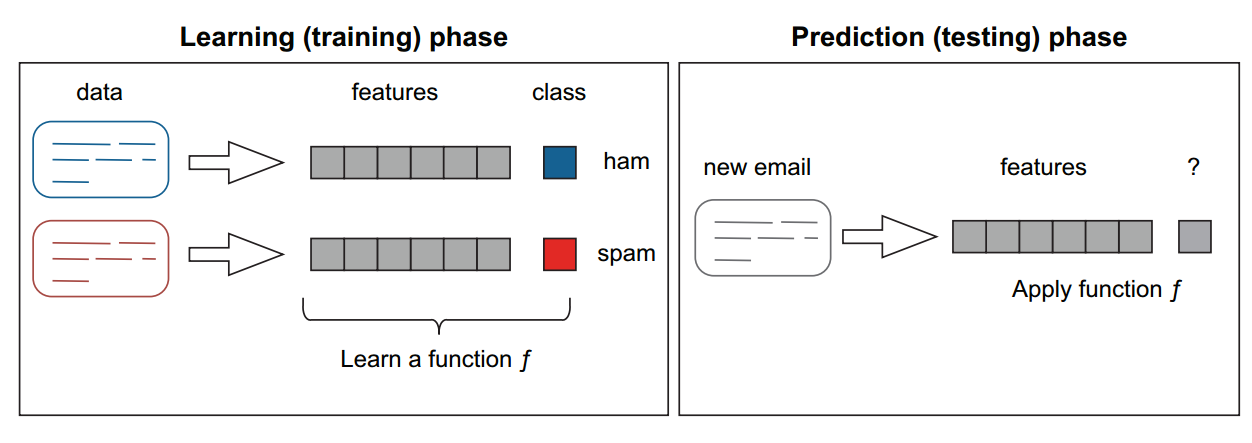


> * Text Classification in Natural Language Processing:

>> * Text classification, a broader area in Natural Language Processing (NLP), aims to identify the class a text belongs to, based on its content. Spam filtering is one such example of text classification.

> * Binary and Multiclass Classification:

>> * Text classification tasks may involve two classes, such as in spam filtering (**spam** versus **ham**) and sentiment analysis (**positive** versus **negative**). 

>> * Alternatively, they may involve more than two classes. For instance, news articles can be classified into various topics like **politics**, **business**, **sports**, and so on.

# Machine Translation in Natural Language Processing

> #### Machine translation is a key application of Natural Language Processing (NLP). It involves translating text from one language to another. Services like Google Translate are practical examples of machine translation.

> ## Early Approaches to Machine Translation

>> In the early stages, machine translation was approached in a **rule-based manner**. This involved programming the system with specific language translation rules. For instance, a rule might dictate the translation of the English word "hello" to the French word "bonjour".

> ## Limitations of Rule-Based Systems

>> However, this approach has its limitations. Language is complex and context-dependent, and it's impossible to write rules to cover every possible scenario.

> ## Modern Approaches to Machine Translation

>> That's why modern machine translation systems typically use **machine learning**. These systems are trained on large amounts of bilingual text data, and they learn to translate new sentences based on the patterns they've learned.

>>> * For example, if you wanted to translate text from English to French, a modern machine translation system would look at the entire sentence, not just individual words.
>>> * It would consider the context of each word and how the words relate to each other.
>>> * This allows it to produce more accurate and natural-sounding translations.

> ## Current State of Machine Translation

>> While machine translation has made significant progress, it's still not perfect. There can be errors, especially with complex sentences or less commonly spoken languages. However, the technology continues to improve, making it an exciting area of research in NLP.


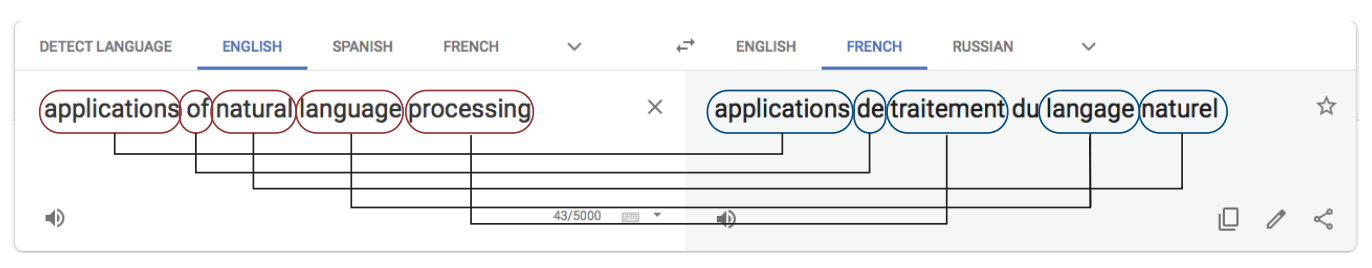

> - Writing rules for translating each case from English to French and expanding the system to other language pairs would not scale.
> - Early rule-based approaches to machine learning took a long time to develop and had limited success.
> - The field benefited from the spread of statistical approaches to NLP tasks and the availability of large amounts of data.
> - Around the 1990s, Statistical Machine Translation (SMT) replaced traditional rule-based approaches.
> - SMT algorithms learn from large amounts of parallel data in two languages, where phrases in one language are mapped to translated phrases in another language.
> - This mapped parallel data is used as training data for the algorithm.
> - After seeing lots of phrases in English-French pairs of texts, the algorithm learns to put the adjective after the noun in French translations with high probability.


# Spell and Grammar Checking in NLP
> - Spell and grammar checking is a common application of NLP.
> - Technology often corrects your spelling and grammar, whether you're using an application like Microsoft Word or typing in your browser.
> - It can suggest improvements to sentence structure and word choice.
> - There are numerous approaches to this application, utilizing a variety of techniques discussed in this section.
>

> ### Approaches to Spell and Grammar Checking: 

>> ### Rule-Based Approach with Dictionary Use:
>> - If a word is unknown to the algorithm (not in a large dictionary of proper English words), it's likely a misspelling.
>> - The algorithm may minimally change the word and check alternatives against the dictionary.
>> - Each change contributes to the overall score or "edit distance".
>> - For example, "thougt" would take one letter insertion to become "thought" or one letter substitution to become "though". It would take one insertion and one substitution to become "through". The algorithm will choose a cheaper option of correcting this misspelling to either "though" or "thought".<br><br>
>> 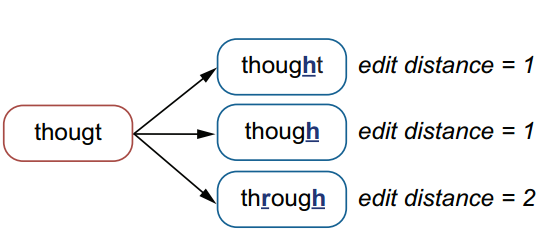
>> ### Machine Learning Approach:
>> - Context is crucial in determining whether a word should be "though", "thought", or "through".
>> - A machine-learning classifier can be used to predict the subtle differences in each case.
>> - The problem can be treated as a machine-translation problem, where the machine learns to translate between incorrect and correct English sentences.
>> - The machine establishes the correct translation in each context.

>> ### Language Modeling Approach:
>> - Sentences like "I just thougt", "I just though", and "I just through" are ungrammatical English and less probable than "I just thought".
>> - A large set of grammatically correct English can be used to train the language-modeling algorithm.

# END of Intro to getting started with NLP